# Project: Investigate a Dataset - [No-Show-Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset **(No-Show-Appointment Dataset)** contains over 100k of medical appointment data across hospitals in Brazil. You can download the dataset [here](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv&sa=D&source=editors&ust=1658755812035267&usg=AOvVaw1xqltIw8Tx87TMHTu0N_t1). 

**Columns Contained In the Dataset**

**PatientId** - A unique identifier indicating the ID of the patient.  

**AppointmentID** - This is a unique identifier that indicates the appointment ID of each patient.  

**Gender** - Shows the geder (Male (M) or Female(F)).  

**ScheduledDay** - This column tells us the actual day for the patient appointmemt. 

**AppointmentDay** - This column tells us the time someone called or registered the appointment.  

**Age** - Contains the age of the patient.  

**Neighborhood** - This column indicates the location of the hospital.  

**Scholarship** - This column shows whether or not the patient is enrolled in Brasilian welfare program. You can read more about 
the program [here](https://www.google.com/url?q=https://en.wikipedia.org/wiki/Bolsa_Fam%25C3%25ADlia&sa=D&source=editors&ust=1658755812036941&usg=AOvVaw3G3weYFzqX4I5mmDFhAxx6)  

**Hipertension** - This column indicates whether the patient has Hipertension or not.  

**Diabetes** - This column indicates whether the patient has Diabetes or not.  

**Alcoholism** - This column indicates whether the patient takes alcohol or not.  

**Handcap** - This column indicates whether the patient is handicapped or not.  

**SMS_received** - This column indicates the number of SMS sent to a patient regarding their appointment.  

**No-show** - This column indicates whether or not the patient showed up for their appointment, **NO** meaning they showed up 
and **Yes** meaning they didn't.  

**You can check out the original source / documentation of the dataset [HERE](https://www.google.com/url?q=https://www.kaggle.com/joniarroba/noshowappointments&sa=D&source=editors&ust=1658755812035842&usg=AOvVaw30DRRztXGlKtOtLi5iqH5a)**



### Questions for Analysis
>**Question 1**: Identify the top five (5) hospital locations by the number of patients that showed up for their appointments and those that didn't.

> **Question 2**: Does being enrolled in the Brasilian welfare program have affect on whether or not patients show up for their appointment?  
             **2b.** For those that did not show up what proportion had and do not have scholarship?  
             **2c.** For those showed up what proportion has and do not have scholarship?

> **Question 3**: Using the age column identify the generation that showed up the most for their medical appointment.

> **Question 4**: Did those who recieved sms show up more for their appointment than those who didn't recieve?

> **Question 5**: Did those who have both Hipertension and diabetes show up more for their medical appointment?

> **Question 6**: Which Disease is higher amongst those scheduled for appointment?

In [1]:
# Uncomment to install any of these packages used in this notebook
#!pip install seaborn

In [2]:
# Import the required libraries for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", None) # Displays all the columns of a dataframe.

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Read in You Data and view the first few rows**

In [4]:
df = pd.read_csv("Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv")
print(df.shape)
df.head()

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Perform operations to inspect data types and look for instances of missing or possibly errant data.**

In [5]:
# Get a statiscal summary of the Numerical columns in the Dataset using '.describe' method.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# Investigate the -1 in the Age column.
df.sort_values("Age").head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [7]:
# Inspect the dataset for data types and null values. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**Issues Identified in the Dataset**

> Change the column names to lower case as it is more conventional.

> Replace (-) in the 'No-show' column name with an underscore, also add an underscore where needed in the column names to be more consistence.

> Drop the row with '-1' in the "AGE" column as its a wrong age input.

> Extract a clean Date and convert to the correct data type (datetime).

> Create a showed_Up column from the no-show column and encode Yes if the patient showed up and No if they didn't.

> Drop columns that is not useful to our analysis including all the engineered columns.

## Findings

> Theres no Null Value in the dataset




### Data Cleaning
 

In [8]:
# Change the column names to lower case

df.columns = df.columns.str.lower()

# Confirm it worked...

df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# Rename the column names accordingly, and also add an underscore where needed in the column names

df.rename(columns={'patientid':'patient_id','appointmentid':'appointment_id','scheduledday':'scheduled_day','appointmentday':
                   'appointment_day','hipertension':'hypertension','handcap':'handicap','no-show':'no_show'}, inplace=True)

# Confirm it worked...

df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
# Drop the row with '-1' in the "AGE" column as its a wrong age input

windex = df[df["age"] == -1].index
df.drop(windex, inplace=True)

In [11]:
# Confirm it was dropped...

df[df["age"] == -1]

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


In [12]:
# Extract a clean Date from the scheduled_day column and convert to the correct data type (datetime)

df["scheduled_day"] = pd.to_datetime(df["scheduled_day"])

df["scheduled_day"] = df["scheduled_day"].dt.date

In [13]:
# Confirm the extracting worked.

df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
# Create a showed_Up column from the no-show column and encode Yes if the patient showed up and No if they didn't.

df["no_show"] = df["no_show"].apply(lambda x: 'Yes' if x=='No' else 'No')
df.rename(columns={'no_show':'showed_up'},inplace=True)

In [15]:
# Confirm it worked...

df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


In [16]:
# Drop columns that is not useful to our analysis.

df.drop(columns=["patient_id","appointment_day"], inplace=True)

The 'patient_id' column was dropped since it contains unique values same as the 'appointment_id' column.
The 'appointment_day' column was dropped because the days are the same with the Scheduled_day column. This means the patients registered the appoints the same day it was scheduled.

In [17]:
# Confirm it worked...
df.head()

,appointment_id,gender,scheduled_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up
0,5642903,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5642503,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,5642549,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,5642828,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,5642494,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1. Identify the top five (5) hospital locations by the number of patients that showed up for their appointments and those that didn't.

> First group by the neighbourhood column, then do a value_count on the 'showed_up' column. Unstack your result to turn the result of your value count into dataframe columns, then sort the dataframe and plot a bar chart to visualize.

In [18]:
top_5 = df.groupby("neighbourhood")["showed_up"].value_counts().unstack().sort_values('Yes').dropna().tail(5)
top_5

showed_up,No,Yes
neighbourhood,,
SANTA MARTHA,496.0,2635.0
JARDIM DA PENHA,631.0,3246.0
RESISTÊNCIA,906.0,3525.0
MARIA ORTIZ,1219.0,4586.0
JARDIM CAMBURI,1465.0,6252.0


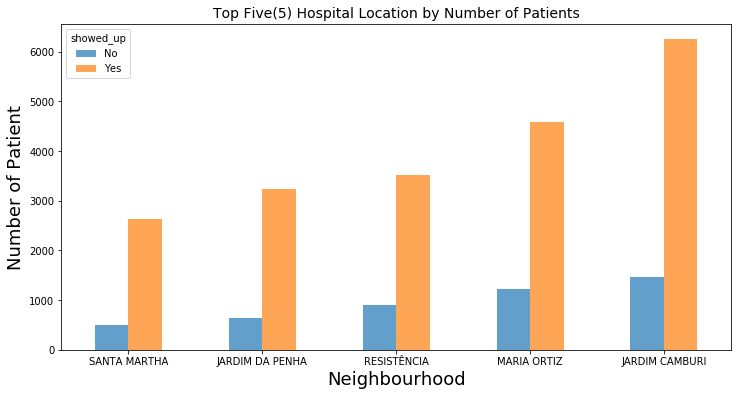

In [19]:
top_5.plot(kind='bar', alpha=0.7, figsize=[12, 6], rot=0)
plt.xlabel('Neighbourhood', fontsize=18)
plt.ylabel('Number of Patient', fontsize=18)
plt.title('Top Five(5) Hospital Location by Number of Patients', fontsize=14);

**The above five(5) Hospital Locations are the top performing locations in terms of number of patients**

### Question 2.  Does being enrolled in the Brasilian welfare program have affect on whether or not patients showed up for their appointment?

> Group your data by the scholarship column, get the proportion and do a value_count of the showed up coulmn. Then vizualise the result in a plot.

In [20]:
# Groupby the scholarship column, get the value counts (normalized) and multiply by 100 to get the proportion

scholar_df = df.groupby('scholarship')["showed_up"].value_counts(normalize=True).mul(100).unstack()
scholar_df

showed_up,No,Yes
scholarship,,
0,19.807355,80.192645
1,23.736304,76.263696


### Aditional Analysis

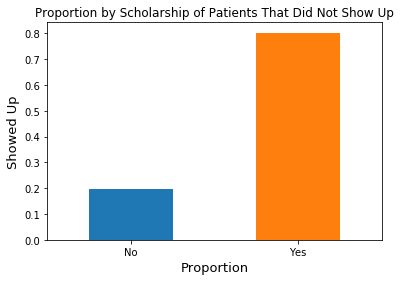

In [21]:
# 2b. For those that did not show up what proportion had and do not have scholarship?
no_show = scholar_df.iloc[0]/scholar_df.iloc[0].sum()
no_show.plot(kind='bar', rot=0);
plt.xlabel("Proportion", fontsize=13)
plt.ylabel("Showed Up", fontsize=13)
plt.title("Proportion by Scholarship of Patients That Did Not Show Up");

For those that did not show up **80%** had scholarship while **20%** does not.

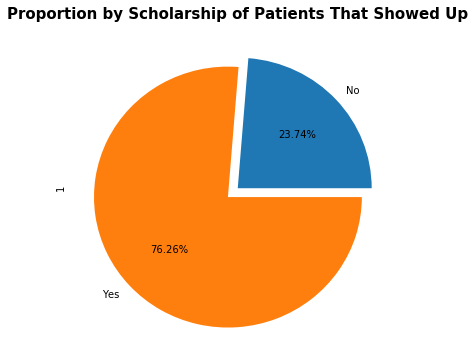

In [22]:
# 2c. For those showed up what proportion had and do not have scholarship?

showed = scholar_df.iloc[1]/scholar_df.iloc[1].sum()

showed.plot(kind='pie',figsize=(6,6),explode=[0,0.1], autopct='%1.2f%%',label=None)
plt.title("Proportion by Scholarship of Patients That Showed Up", fontsize=15,weight= 'bold');

For Patients that showed up, about **76%** Had scholarship and **24%** did not have scholarship

In [23]:
# Group by the scholarship column, get the value counts and get the proportion

scholar_df1 = df.groupby('scholarship')["showed_up"].value_counts().unstack()
scholar_df1.rename(index={0:'No', 1:'Yes'}, inplace=True)
scholar_plot = scholar_df1.loc[:,"Yes"] / scholar_df1.loc[:,"Yes"].sum()
scholar_plot

scholarship
No     0.906096
Yes    0.093904
Name: Yes, dtype: float64

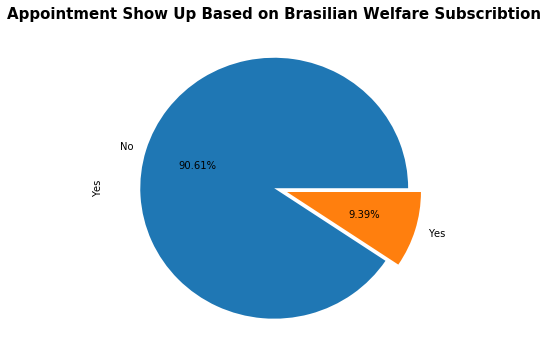

In [24]:
# Plot the graph

scholar_plot.plot(kind='pie', explode=[0,0.1], figsize= [6, 6], autopct='%1.2f%%')
labels=None
plt.title("Appointment Show Up Based on Brasilian Welfare Subscribtion",fontsize=15,weight= 'bold');

From the analysis above, patients that are not enrolled in the Brasilian Welfare Program registered more and showed up more for their appointment than those that are enrolled in the welfare program.
As they have a high proportion of **91%**

### Question 3. Using the age column identify the generation that showed up the most for their medical appointment.

In [25]:
# Create bin edges that will be used to "cut" the data into generations

bin_edges = [0,25,41,57,67,76,94,100]

# Labels for the seven generations
bin_names = ['Gen Z','Millennials','Gen X','Boomers II','Boomers I','Post War','WW II']

In [26]:
# Create Generations
df['generation'] = pd.cut(df['age'], bin_edges, labels=bin_names,include_lowest=True)

# Checks for successful creation of this column
df.head()

,appointment_id,gender,scheduled_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up,generation
0,5642903,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes,Boomers II
1,5642503,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes,Gen X
2,5642549,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Yes,Boomers II
3,5642828,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes,Gen Z
4,5642494,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,Gen X


In [27]:
# Create a function That groups the dataset, plot the a bar chart and add labels appropriately.

def proportion_plot(df,column,normalize=False,mul=1):
    '''
    This function groups a dataset by the specified column and visualize it in a bar chart
    INPUT: df = dataframe object
           column = the desired column to be used to group the dataset
    OPTIONAL INPUT: normalize (False by default)
                    mul (1 by default)
    OUTPUT: A bar chart.
    '''
    # Grouping the dataset and plotting the graph
    
    df_plot = df.groupby(column)["showed_up"].value_counts(normalize=normalize).unstack("showed_up").mul(mul)["Yes"]
    df_plot.plot.bar(rot=0, figsize=[8,5]);
    plt.title(f'{"Percentage" if normalize else "Frequency"} of {column} who showed up'.title(), fontsize=13, weight="bold")
    plt.xlabel(column.title(), fontsize=10, weight="bold")
    plt.ylabel(f'{"Percentage" if normalize else "Frequency"}'.title(), fontsize=10, weight="bold")

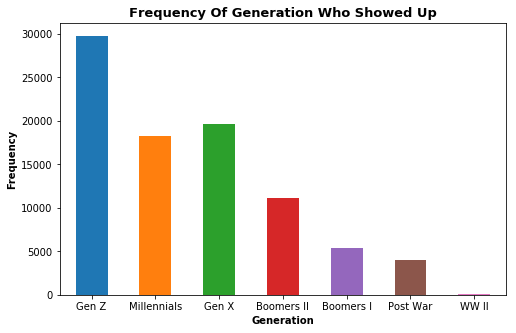

In [28]:
# Call the function.

proportion_plot(df,"generation")

From the analysis above, the Gen Z showed up the most for their medical appointment followed by the Gen X and the Millenials.

### Question 4. Did those who recieved sms show up more for their appointment than those who didn't recieve?

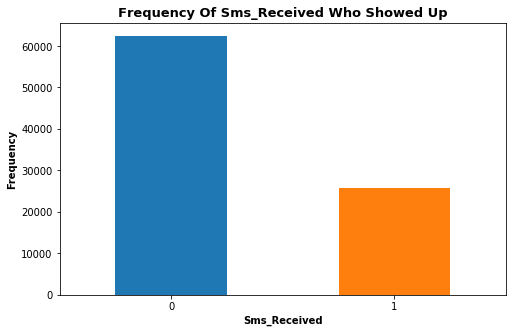

In [29]:
# Call the function created above and specify the column of interest.

proportion_plot(df,"sms_received")

From the above analysis, those that didnt receive SMS showed up more for their appointment than those that recieved SMS.

### Question 5. Did those who have both Hypertension and diabetes show up more for their medical appointment?

In [30]:
# subset the data to only those who have hypertension and diabetes

hyper_df = df[(df["hypertension"] == 1) & (df["diabetes"] == 1)]
print(hyper_df.shape)
hyper_df.head()

(6486, 13)


,appointment_id,gender,scheduled_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,showed_up,generation
4,5642494,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes,Gen X
36,5637975,F,2016-04-29,63,SÃO CRISTÓVÃO,0,1,1,0,0,0,Yes,Boomers II
37,5637986,F,2016-04-29,64,TABUAZEIRO,1,1,1,0,0,0,Yes,Boomers II
44,5635414,F,2016-04-28,78,SÃO CRISTÓVÃO,0,1,1,0,0,0,No,Post War
47,5633116,F,2016-04-28,39,MARUÍPE,0,1,1,0,0,0,Yes,Millennials


In [31]:
# Group the data by the showed up column

hyper_d = hyper_df.groupby('showed_up')['hypertension'].count()
hyper_d

showed_up
No     1141
Yes    5345
Name: hypertension, dtype: int64

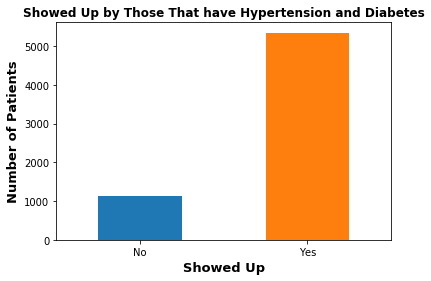

In [32]:
hyper_d.plot(kind='bar', rot=0);
plt.xlabel("Showed Up", fontsize =13, weight="bold")
plt.ylabel("Number of Patients", fontsize=13, weight="bold")
plt.title("Showed Up by Those That have Hypertension and Diabetes",weight="bold");

From the analysis above, patients that has both hypertension and diabetes showed up more for their appointments.

### Question 6. Which Disease is higher amongst those scheduled for appointment?

In [33]:
# Find the mean of the disease columns

diseases_df = df[["hypertension","diabetes","alcoholism","handicap"]].mean()*100
diseases_df

hypertension    19.724771
diabetes         7.186544
alcoholism       3.040009
handicap         2.224816
dtype: float64

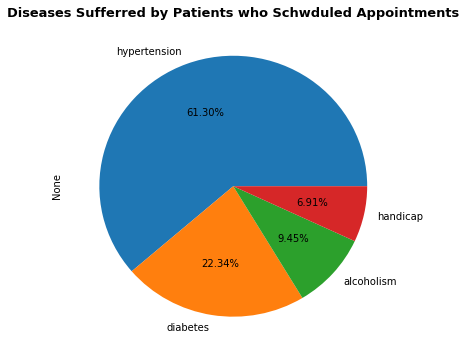

In [34]:
# Plot the distribution of the mean

diseases_df.plot(kind='pie', figsize=[6,6], explode=None, autopct= '%1.2f%%')
plt.title("Diseases Sufferred by Patients who Schwduled Appointments", fontsize=13, weight="bold");

From the analysis above, Hypertension is the highest disease amongst those sheduled for appointment, making up **65%** of all who scheduled appointments.

<a id='conclusions'></a>
## Conclusions

> Hospitals located at **SANTA MARTHA, JARDIM DA PENHA, RESISTÊNCIA, MARIA ORTIZ** and **JARDIM CAMBURI** have the highest number of patients.

> About **91%** of those that showed up for their appointments are not subscribed to the Brasilian Welfare Program.  
    > For those that did not show up **80%** had scholarship while **20%** does not.  
    > For Patients that showed up, about **76%** Had scholarship and **24%** did not have scholarship

> **Gen Z** has the highest number of patients that showed up for their appointment.

> Receiving SMS did not propel patients to show up more for their appointments.

> Patients suffering from both hypertension and diabetes showed up more for their appointment.

> **Hypertension** is the most prevalent disease amongst all the patients that was scheduled for appointment, with a prevalence rate of **65%**

### Limitation:
> The Appointment Day column didn't include the hourly timestamp wich makes it hard to investigate the show up rate and possibly find out the time of the day patients show up more.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0